
# Data and computations for paper 

Lars G. Johnsen
National Library of Norway

In [1]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
mu.update('collocations')
from collocations import dist_coll_urn
import pandas as pd

Updated file `D:\Documents\GitHub\newspapers_coll_conc\collocations.py`

In [2]:
def df_jaccard(df, col1, col2, number=100, asc=False):
    s1 = df.sort_values(by=col1, ascending=asc)[:number].index
    s2 = df.sort_values(by=col2, ascending=asc)[:number].index
    
    #print(len(set(s1)&set(s2)))
    
    return jaccard(s1, s2)

In [3]:
def jaccard(s1, s2):
    return len(set(s1)&set(s2))/len(set(s1)|set(s2))

In [58]:
def make_coll_df(small, large, tot):
    """take two collocations, small and large, and a reference tot. The reference must av a column call tot as well"""
    coll = pd.DataFrame()
    coll['small'] = small['freq']
    coll['large'] = large['freq']
    coll['sdist'] = small.score
    coll['ldist'] = large.score
    #coll['ratio'] = coll['small']/coll['large']
    coll['srel'] = coll.small/coll.small.sum()
    coll['lrel'] = coll.large/coll.large.sum()
    coll['ratio_rel'] = coll.srel**0.2*coll.srel/coll.lrel
    coll['nb'] = coll.small/tot.tot
    coll['combo'] = small.ascore*large.ascore
    coll['mass_dist'] = coll.combo * coll.ratio_rel
    return coll

### Reference corpus

The reference is the total counts from approximately 450 000 books from nb.no

In [5]:
tot = nb.frame(nb.totals(50000), 'tot')

In [6]:
nb.normalize_corpus_dataframe(tot)
tot.head()

,tot
.,0.058921
",",0.051453
og,0.025297
i,0.021425
det,0.012728


# Corpus

The corpus for doing collocations is a sample of 800 books from fictional literature, dewey decimal code 813.

In [7]:
corpus = nb.book_corpus(ddk="813%", period=(1980, 2000), limit = 500)

In [8]:
corpus

,urn,author,title,year
0,2007111904080,"Johnson, Lois Walfrid",Kate og Anders og det hemmelige budskapet,1993
1,2007112801053,"Cussler, Clive",Skatten,1993
2,2014081908208,"Robbins, David",Ondt blod i Dakota,1991
3,2010040803001,"Paretsky, Sara",Lys i tunnelen,1995
4,2016070748070,"Sundquist, Åsebrit",Pocahontas &amp; co,1987
...,...,...,...,...
495,2007092601009,"Sinclair, Helene",Spillets mester,1991
496,2008061704143,,Walt Disney presenterer Donalds nye svømmebasseng,1996
497,2016090948010,"Whitney, Phyllis A.",Drømmen som nektet å dø,1989
498,2007081700055,"Szekeres, Cyndy",nye babyen,1989


Set up the distance parameters and collword, smd is small distance while lmd is large distance. These values are half of the actual window, and used to make a normalized score, call ascore. See below.

In [34]:
smd = 2.5
lmd = 5
collword = 'spille'

In [35]:
a1 = dist_coll_urn(collword, urns=list(corpus.urn), after= int(2*smd), before = 0)
a2 = dist_coll_urn(collword, urns=list(corpus.urn), after= int(2*lmd), before = 0)

In [36]:
b1 = dist_coll_urn(collword, urns=list(corpus.urn), after=0, before = int(2*smd))
b2 = dist_coll_urn(collword, urns=list(corpus.urn), after=0, before = int(2*lmd))

## Normalized distance score

In [73]:
n = 1

In [74]:

a1['ascore'] = smd/a1.score**n
a2['ascore'] = lmd/a2.score**n

In [75]:
b1['ascore'] = smd/b1.score**n
b2['ascore'] = lmd/b2.score**n

## Create collocation dataframe 

Based on data from a1 and a2, and b1 and b2. The name for the collocations after is `coll` while `collb` is for the collocates coming before.

In [76]:
coll = make_coll_df(a1, a2, tot)
collb = make_coll_df(b1, b2, tot)

In [77]:
coll.sort_values(by='mass_dist', ascending=False)[:20]

,small,large,sdist,ldist,srel,lrel,ratio_rel,nb,combo,mass_dist
tennis,78.0,80.0,1.26,1.36,0.004466,0.002538,0.596354,3.171986e+07,7.294585,4.350152
gitar,26.0,27.0,1.10,1.25,0.001489,0.000856,0.472808,7.697188e+06,9.090909,4.298252
sjakk,36.0,36.0,1.20,1.27,0.002061,0.001142,0.524012,9.004576e+06,8.202100,4.297995
rollen,107.0,114.0,1.21,1.63,0.006127,0.003616,0.611556,7.564988e+06,6.337778,3.875904
golf,51.0,51.0,1.33,1.38,0.002920,0.001618,0.561816,1.402144e+07,6.810505,3.826253
teater,36.0,37.0,1.17,1.49,0.002061,0.001174,0.509849,2.702465e+06,7.170309,3.655775
kort,117.0,121.0,1.41,1.58,0.006699,0.003838,0.641384,7.314796e+05,5.610917,3.598751
baseball,21.0,21.0,1.22,1.34,0.001202,0.000666,0.470462,NaN,7.646195,3.597241
squash,17.0,18.0,1.12,1.34,0.000973,0.000571,0.425938,1.384338e+07,8.328891,3.547593
fotball,40.0,42.0,1.26,1.47,0.002290,0.001332,0.509686,4.340323e+06,6.748731,3.439736


In [78]:
collb.sort_values(by='ratio_rel', ascending=False)[:20]

,small,large,sdist,ldist,srel,lrel,ratio_rel,nb,combo,mass_dist
å,1879.0,2134.0,-1.25,-2.01,0.107587,0.067547,1.019780,219129.678554,4.975124,5.073530
skal,200.0,226.0,-1.74,-2.51,0.011451,0.007153,0.654811,109945.584414,2.862115,1.874145
begynte,147.0,157.0,-2.36,-2.66,0.008417,0.004969,0.651433,639052.232337,1.991207,1.297138
til,559.0,784.0,-2.38,-4.02,0.032007,0.024816,0.647988,47183.675333,1.306493,0.846591
skulle,236.0,283.0,-1.57,-2.67,0.013513,0.008958,0.637818,241033.631402,2.981941,1.901935
vil,139.0,164.0,-2.17,-3.04,0.007959,0.005191,0.583126,77567.466139,1.894858,1.104941
ikke,407.0,607.0,-2.70,-4.43,0.023304,0.019213,0.571891,63401.914081,1.045063,0.597662
kan,188.0,246.0,-1.87,-3.34,0.010764,0.007787,0.558525,54628.877932,2.001345,1.117802
kunne,192.0,259.0,-2.03,-3.60,0.010993,0.008198,0.544064,136114.342347,1.710454,0.930597
sluttet,39.0,40.0,-2.42,-2.65,0.002233,0.001266,0.520243,821348.188604,1.949166,1.014039


## Sorting 

Sorting on the reference is by column 'nb'

In [79]:
coll.sort_values(by='nb', ascending=False)[:20][:20].fillna(0).style.background_gradient()

,small,large,sdist,ldist,srel,lrel,ratio_rel,nb,combo,mass_dist
tennis,78,80,1.26,1.36,0.00446608,0.00253751,0.596354,3.17199e+07,7.29458,4.35015
poker,25,27,1.42,2.26,0.00143143,0.000856409,0.451071,2.31474e+07,3.89505,1.75694
golf,51,51,1.33,1.38,0.00292013,0.00161766,0.561816,1.40214e+07,6.8105,3.82625
squash,17,18,1.12,1.34,0.000973375,0.000570939,0.425938,1.38434e+07,8.32889,3.54759
piano,55,56,1.36,1.54,0.00314916,0.00177626,0.56018,9.9614e+06,5.9683,3.34332
puss,32,37,3.1,3.87,0.00183224,0.0011736,0.442648,9.50017e+06,1.04193,0.461207
sjakk,36,36,1.2,1.27,0.00206127,0.00114188,0.524012,9.00458e+06,8.2021,4.29799
gitar,26,27,1.1,1.25,0.00148869,0.000856409,0.472808,7.69719e+06,9.09091,4.29825
rollen,107,114,1.21,1.63,0.00612654,0.00361595,0.611556,7.56499e+06,6.33778,3.8759
bridge,22,22,1.28,1.4,0.00125966,0.000697815,0.474859,6.64805e+06,6.97545,3.31236


In [80]:
coll.sort_values(by='mass_dist', ascending=False)[:20].fillna(0).style.background_gradient()

,small,large,sdist,ldist,srel,lrel,ratio_rel,nb,combo,mass_dist
tennis,78,80,1.26,1.36,0.00446608,0.00253751,0.596354,3.17199e+07,7.29458,4.35015
gitar,26,27,1.1,1.25,0.00148869,0.000856409,0.472808,7.69719e+06,9.09091,4.29825
sjakk,36,36,1.2,1.27,0.00206127,0.00114188,0.524012,9.00458e+06,8.2021,4.29799
rollen,107,114,1.21,1.63,0.00612654,0.00361595,0.611556,7.56499e+06,6.33778,3.8759
golf,51,51,1.33,1.38,0.00292013,0.00161766,0.561816,1.40214e+07,6.8105,3.82625
teater,36,37,1.17,1.49,0.00206127,0.0011736,0.509849,2.70246e+06,7.17031,3.65578
kort,117,121,1.41,1.58,0.00669911,0.00383798,0.641384,731480,5.61092,3.59875
baseball,21,21,1.22,1.34,0.0012024,0.000666096,0.470462,0,7.6462,3.59724
squash,17,18,1.12,1.34,0.000973375,0.000570939,0.425938,1.38434e+07,8.32889,3.54759
fotball,40,42,1.26,1.47,0.00229029,0.00133219,0.509686,4.34032e+06,6.74873,3.43974


# collb

In [81]:
collb.sort_values(by='mass_dist', ascending=False)[['nb', 'mass_dist']][:40].fillna(0).style.background_gradient()

,nb,mass_dist
å,219130,5.07353
tungen,669553,2.23607
skulle,241034,1.90193
skal,109946,1.87414
a,2951.09,1.69556
begynte,639052,1.29714
måtte,109625,1.25349
kan,54628.9,1.1178
vil,77567.5,1.10494
burde,147932,1.07167


In [82]:
collb.sort_values(by='nb', ascending=False)[['nb', 'mass_dist']][:40].fillna(0).style.background_gradient()

,nb,mass_dist
orkesteret,1.2539e+07,0.677682
musikerne,6.50935e+06,0.328011
Bandet,3.88861e+06,0.186372
pianoet,2.77389e+06,0.104518
strengene,2.21537e+06,0.241793
lommelykten,1.90098e+06,0.288111
kaviar,1.88139e+06,0.392765
puslespill,1.79044e+06,0.334743
Wally,1.77395e+06,0.175342
plystre,1.64623e+06,0.334743


# coll

In [83]:
coll.sort_values(by='mass_dist', ascending=False)[['nb', 'mass_dist','combo']][:10].fillna(0).style.background_gradient()

,nb,mass_dist,combo
tennis,3.17199e+07,4.35015,7.29458
gitar,7.69719e+06,4.29825,9.09091
sjakk,9.00458e+06,4.29799,8.2021
rollen,7.56499e+06,3.8759,6.33778
golf,1.40214e+07,3.82625,6.8105
teater,2.70246e+06,3.65578,7.17031
kort,731480,3.59875,5.61092
baseball,0,3.59724,7.6462
squash,1.38434e+07,3.54759,8.32889
fotball,4.34032e+06,3.43974,6.74873


In [84]:
coll.sort_values(by='nb', ascending=False)[['nb', 'mass_dist','combo']][:10].fillna(0).style.background_gradient()

,nb,mass_dist,combo
tennis,3.17199e+07,4.35015,7.29458
poker,2.31474e+07,1.75694,3.89505
golf,1.40214e+07,3.82625,6.8105
squash,1.38434e+07,3.54759,8.32889
piano,9.9614e+06,3.34332,5.9683
puss,9.50017e+06,0.461207,1.04193
sjakk,9.00458e+06,4.29799,8.2021
gitar,7.69719e+06,4.29825,9.09091
rollen,7.56499e+06,3.8759,6.33778
bridge,6.64805e+06,3.31236,6.97545


# jaccard similarity

# for collb

In [85]:
jaccard_scoresb = nb.frame({'mass_dist': {x:df_jaccard(collb, 'nb', 'mass_dist', x) for x in range(5, 210, 5)},
                            'dist_combo': {x:df_jaccard(collb, 'nb', 'combo', x) for x in range(5, 210, 5)},
                           'mass_ratio': {x:df_jaccard(collb, 'nb', 'ratio_rel', x) for x in range(5, 210, 5)}
                          }).transpose()

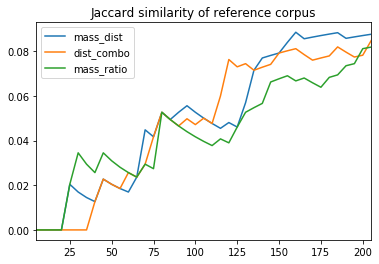

In [86]:
jaccard_scoresb.plot(title='Jaccard similarity of reference corpus');

# for coll

In [87]:
jaccard_scores = nb.frame({'mass_dist': {x:df_jaccard(coll, 'nb', 'mass_dist', x) for x in range(5, 210, 5)},
                            'dist_combo': {x:df_jaccard(coll, 'nb', 'combo', x) for x in range(5, 210, 5)},
                           'mass_ratio': {x:df_jaccard(coll, 'nb', 'ratio_rel', x) for x in range(5, 210, 5)}
                          }).transpose()

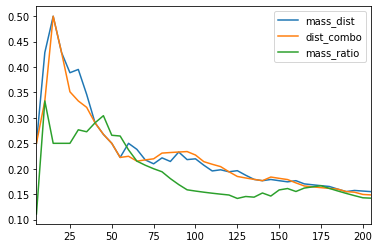

In [88]:
jaccard_scores.plot();